Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 114)]        0           []                               
                                                                                                  
 normalization_1 (Normalization  (None, 114)         229         ['inputs[0][0]']                 
 )                                                                                                
                                                                                                  
 dense_39 (Dense)               (None, 32)           3680        ['normalization_1[0][0]']        
                                                                                                  
 dense_40 (Dense)               (None, 32)           1056        ['dense_39[0][0]']         

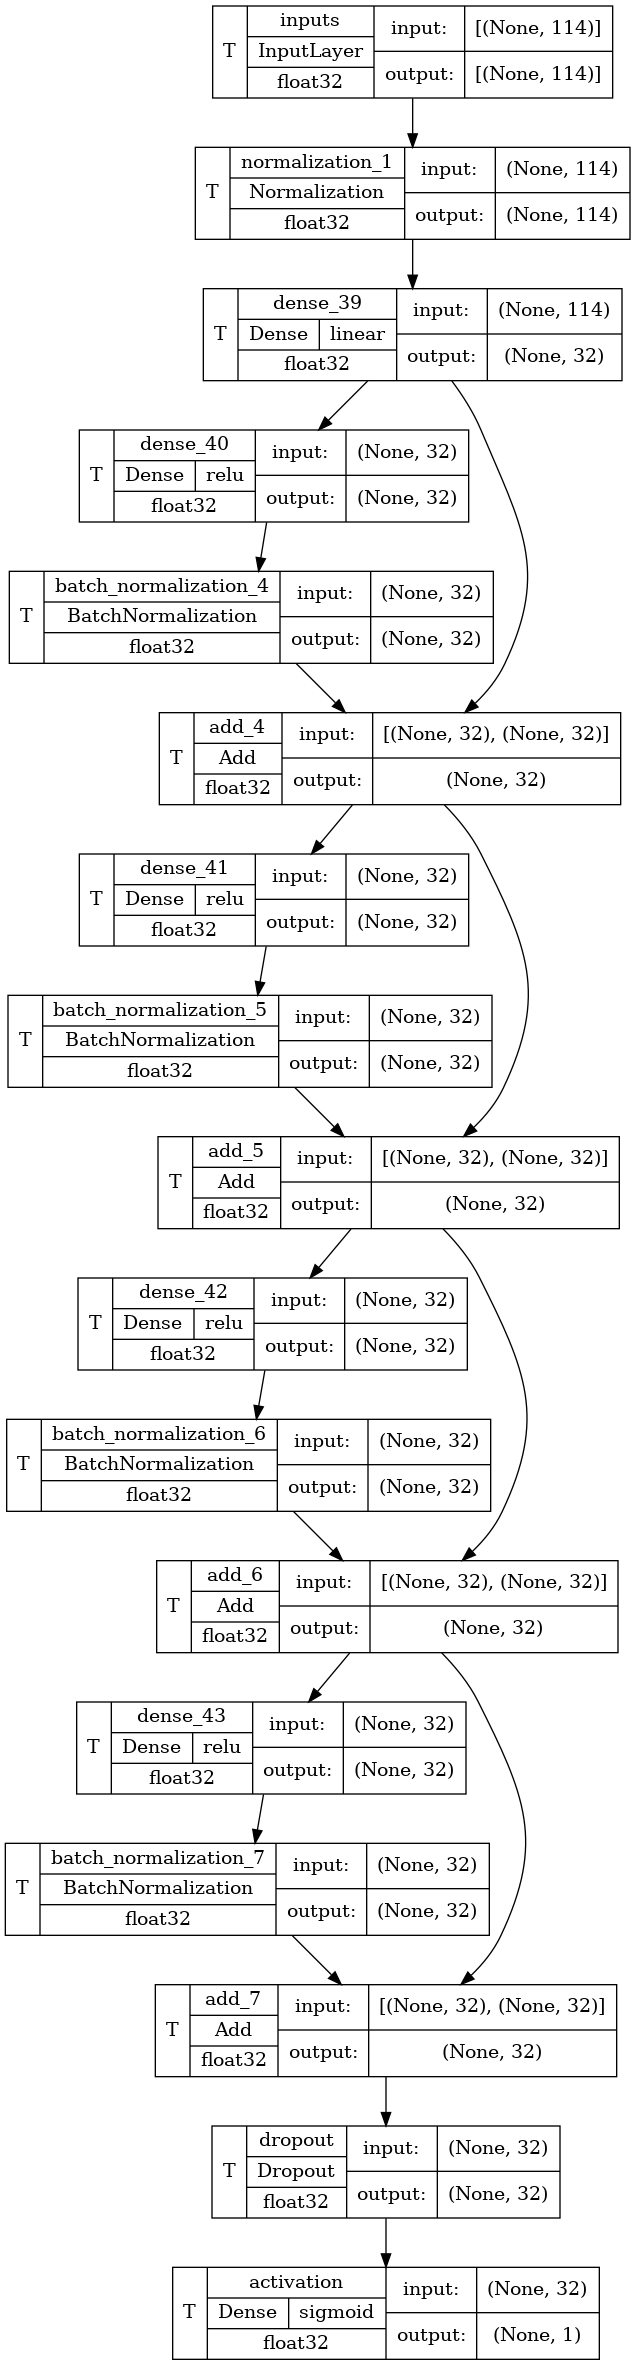

In [23]:
import tensorflow as tf

VEC_POS = 2
ACTION_CLASSES = 17
HAND = ACTION_CLASSES
DECK = ACTION_CLASSES
STATUS_CLASSES = 9
UNIT_ATTRIBUTES = 3
END_TURN_CAST = 1

FF_SIZE = 32
NUM_RESIDUAL_BLOCKS = 4

cast_input_size = END_TURN_CAST + ACTION_CLASSES + VEC_POS
caster_input_size = UNIT_ATTRIBUTES + HAND + DECK + STATUS_CLASSES
opponent_input_size = VEC_POS + UNIT_ATTRIBUTES + HAND + DECK + STATUS_CLASSES

input_tensor = tf.keras.layers.Input(shape=(cast_input_size + caster_input_size + opponent_input_size,), name="inputs")


def res_block(size: int, block_input: tf.keras.layers.Layer):
    ff = tf.keras.layers.Dense(size, activation='relu')(block_input)
    bnorm = tf.keras.layers.BatchNormalization()(ff)
    return tf.keras.layers.Add()([block_input, bnorm])


normalization_layer = tf.keras.layers.Normalization(axis=(-1))(input_tensor)
x = tf.keras.layers.Dense(FF_SIZE)(normalization_layer)
for _ in range(NUM_RESIDUAL_BLOCKS):
    x = res_block(FF_SIZE, x)
x = tf.keras.layers.Dropout(0.25, name="dropout")(x)
x = tf.keras.layers.Dense(1, activation="sigmoid", name="activation")(x)

model = tf.keras.models.Model(inputs=input_tensor, outputs=x)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])
model.summary()

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True
)


In [3]:
tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-16 12:14:41.552587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 12:14:41.552698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 12:14:41.552756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 12:14:41.552942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 12:14:41.552955: I tensorflow/core/co

True

da_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 12:14:41.553025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /device:GPU:0 with 9554 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1


In [26]:
import pandas as pd
import numpy as np
import os

path = "../gaf6/generated6/"
csv_frames = []  # pd.read_csv(path + "data.csv")
with open("../data_headers.txt") as f:
    headers = list(line.rstrip("\n") for line in f)

for file in os.listdir(path):
    if not file.endswith(".csv"):
        continue

    filepath = path + file
    cdf = pd.read_csv(filepath, names=headers)
    csv_frames.append(cdf)
    break

df = pd.concat(csv_frames, axis=0, ignore_index=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Columns: 116 entries, CAST_END_TURN to SCORE
dtypes: float64(1), int64(115)
memory usage: 6.2 MB


,CAST_END_TURN,CAST_COMBINE_ACTIONS,CAST_WRATHSPARK,CAST_GROUNDRAISE,CAST_TREAD,CAST_COILBLADE,CAST_ETERNALSHACLES,CAST_NETHERSWAP,CAST_WISPSPARKS,CAST_BONEDUST,...,TRG_STATUS_SLOW,TRG_STATUS_COUNTDOWN,TRG_STATUS_SHACLES,TRG_STATUS_DUSTED,TRG_STATUS_SPIRITING,TRG_STATUS_IMMOLATION,TRG_STATUS_CORE_ARMOR,TRG_STATUS_HOARFROST_ARMOR,VISITS,SCORE
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4517,1.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,942,0.502132
2,0,0,0,0,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,1698,0.905117
3,0,0,0,0,0,0,0,1,0,0,...,0,0,3,0,0,0,0,0,1876,1.000000
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,510,0.112907


In [17]:
# Normalize columns and convert bools to 0-1

# def norm(series):
#     return (series - np.min(series)) / (np.max(series) - np.min(series))
#
#
# for col, col_type in zip(df.columns, df.dtypes):
#     if col_type == bool:
#         df[col] = df[col].map(float)
#     else:
#         df[col] = norm(df[col])
#
# df.fillna(0, inplace=True)
# df.head()

# Normalize exploit


In [75]:
# Finding min and max values

for column_name in df.columns:
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    print(f"Column: {column_name}, Minimum value: {min_value}, Maximum value: {max_value}")

Column: CAST_END_TURN, Minimum value: 0, Maximum value: 1
Column: CAST_COMBINE_ACTIONS, Minimum value: 0, Maximum value: 1
Column: CAST_WRATHSPARK, Minimum value: 0, Maximum value: 1
Column: CAST_GROUNDRAISE, Minimum value: 0, Maximum value: 0
Column: CAST_BLOODDRAWING, Minimum value: 0, Maximum value: 0
Column: CAST_TREAD, Minimum value: 0, Maximum value: 1
Column: CAST_ETERNALSHACLES, Minimum value: 0, Maximum value: 1
Column: CAST_NETHERSWAP, Minimum value: 0, Maximum value: 1
Column: CAST_WISPSPARKS, Minimum value: 0, Maximum value: 1
Column: CAST_BONEDUST, Minimum value: 0, Maximum value: 1
Column: CAST_BONESPARKS, Minimum value: 0, Maximum value: 1
Column: CAST_RESPIRIT, Minimum value: 0, Maximum value: 1
Column: CAST_SUNDIVE, Minimum value: 0, Maximum value: 1
Column: CAST_METEORSHATTER, Minimum value: 0, Maximum value: 0
Column: CAST_ARMORCORE, Minimum value: 0, Maximum value: 1
Column: CAST_IMMOLATION, Minimum value: 0, Maximum value: 1
Column: CAST_HOARFROST, Minimum value: 0

In [84]:
# Split input and output (X and Y)
predict = 'SCORE'

X = np.array(df.drop(predict, axis=1).drop("VISITS", axis=1))  # Features
y = np.array(df[predict])  # Labels

In [85]:
model.layers[1].adapt(X)  # Adapt the Normalization layer to data

In [6]:
# # Random forest
# import tensorflow_decision_forests as tfdt
#
# tf_dataset = tfdt.keras.pd_dataframe_to_tf_dataset(df, label="EXPLOIT")
# model = tfdf.keras.RandomForestModel()
# model.fit(tf_dataset)

In [29]:
# duplicate detection

d = {}
dupes = 0
total_rows = 0
d_visits = {}

action_count = 18
baseline = [0] * action_count
culprit = [0] * action_count

for row in df.iterrows():
    total_rows += 1
    index, *row_data = row
    *key, visits, value = row_data[0]
    tkey = tuple(key)

    for i in range(18):
        baseline[i] += tkey[i]

    if tkey in d:
        dupes += 1
        diff = abs(value - d[tkey])

        if diff < 0.1:
            continue
        print("!!! High Difference duplicate !!!")
        print(f"existing: {d[tkey]} ({d_visits[tkey]}) \tnew: {value} ({visits})\tdiff: {diff}")
        print(f"key: {tkey}")

        for i in range(18):
            culprit[i] += tkey[i] * value

    else:
        d_visits[tkey] = visits
        d[tkey] = value
    # break
print(f"total dupes {dupes} ({round(dupes / total_rows * 100)}%)")

!!! High Difference duplicate !!!
existing: 0.220783 (767.0) 	new: 0.0988924 (500.0)	diff: 0.1218906
key: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 2.0, 17.0, -2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 5.0, 0.0, 5.0, 12.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0)
!!! High Difference duplicate !!!
existing: 0.216461 (931.0) 	new: 0.333428 (1178.0)	diff: 0.11696700000000002
key: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 12.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.

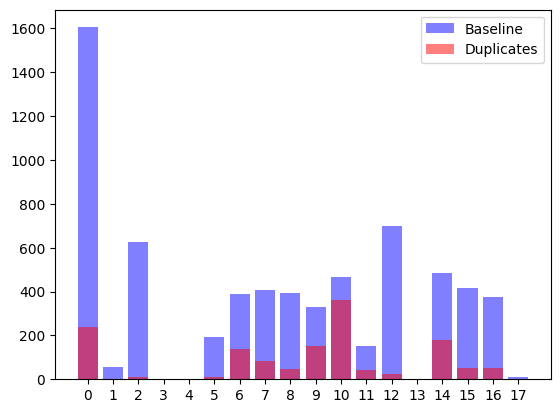

[24.011964300000002, 0.0201848, 0.8173864, 0.0, 0.0, 1.22979435, 14.02638674, 8.257583999999998, 4.887345099999999, 15.215727999999999, 36.23718990000001, 4.0711769, 2.36537, 0.0, 18.0532602, 4.9769542, 4.948343899999999, 0.0]


In [93]:
import matplotlib.pyplot as plt

indices = range(len(baseline))
plt.bar(indices, baseline, color='blue', alpha=0.5, label='Baseline')
plt.bar(indices, [value * 10 for value in culprit], color='red', alpha=0.5, label='Duplicates')
plt.xticks(indices, indices)
plt.legend()
plt.show()

print(culprit)

In [86]:
model.fit(X, y, validation_split=0.1, epochs=25, batch_size=32)

Epoch 1/25


2024-03-14 21:02:43.645500: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fca18018670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-14 21:02:43.645544: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-03-14 21:02:43.694497: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-14 21:02:43.979594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-03-14 21:02:44.267499: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


186/186 [==============================] - 7s 15ms/step - loss: 1.0162 - accuracy: 0.1702 - val_loss: 0.8857 - val_accuracy: 0.2526
Epoch 2/25
186/186 [==============================] - 3s 15ms/step - loss: 0.7714 - accuracy: 0.1799 - val_loss: 0.8767 - val_accuracy: 0.2708
Epoch 3/25
186/186 [==============================] - 3s 15ms/step - loss: 0.6868 - accuracy: 0.1845 - val_loss: 0.8641 - val_accuracy: 0.2693
Epoch 4/25
186/186 [==============================] - 3s 14ms/step - loss: 0.6273 - accuracy: 0.1912 - val_loss: 0.8148 - val_accuracy: 0.2587
Epoch 5/25
186/186 [==============================] - 3s 14ms/step - loss: 0.6033 - accuracy: 0.1914 - val_loss: 0.7950 - val_accuracy: 0.2587
Epoch 6/25
186/186 [==============================] - 3s 16ms/step - loss: 0.5835 - accuracy: 0.1944 - val_loss: 0.7909 - val_accuracy: 0.2572
Epoch 7/25
186/186 [==============================] - 3s 17ms/step - loss: 0.5742 - accuracy: 0.1973 - val_loss: 0.7722 - val_accuracy: 0.2602
Epoch 8/25

KeyboardInterrupt: 

In [41]:
loss, accuracy = model.evaluate(X, y)


def sigmoid(logits):
    # converts from -inf, inf to 0-1 range
    return 1 / (1 + np.exp(-logits))


import random

for i in range(20):
    random_index = random.randint(0, len(df))
    data = df.loc[random_index]
    ground_truth = data[-1]
    log_prediction = model.predict(np.expand_dims(data[:-1], axis=0), )[0][0]
    prediction = sigmoid(log_prediction)
    prediction = log_prediction
    print(
        f"Data({random_index})\tTruth:{round(ground_truth, 2)}\tPred:{round(prediction, 2)}\t(log: {round(log_prediction, 5)})")

1/1 [==============================] - 0s 24ms/step
Data(26692)	Truth:0.03	Pred:0.27000001072883606	(log: 0.2685199975967407)
1/1 [==============================] - 0s 21ms/step
Data(57457)	Truth:0.1	Pred:0.41999998688697815	(log: 0.4160799980163574)
1/1 [==============================] - 0s 23ms/step
Data(86268)	Truth:0.01	Pred:0.25999999046325684	(log: 0.25867998600006104)
1/1 [==============================] - 0s 23ms/step
Data(76024)	Truth:0.29	Pred:0.699999988079071	(log: 0.6980100274085999)
1/1 [==============================] - 0s 23ms/step
Data(71337)	Truth:0.46	Pred:0.47999998927116394	(log: 0.47843998670578003)
1/1 [==============================] - 0s 23ms/step
Data(56729)	Truth:0.23	Pred:0.4399999976158142	(log: 0.44376999139785767)
1/1 [==============================] - 0s 17ms/step
Data(14080)	Truth:0.71	Pred:0.7699999809265137	(log: 0.7682300209999084)
1/1 [==============================] - 0s 16ms/step
Data(13347)	Truth:1.0	Pred:0.20999999344348907	(log: 0.2135400027036

AttributeError: 'Functional' object has no attribute 'vcon'

In [29]:


model_save_path = "./dueler_model/"
if not os.path.isdir(model_save_path):
    os.mkdir(model_save_path)

tf.saved_model.save(model, model_save_path)


2024-03-14 13:27:49.144004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2024-03-14 13:27:49.701623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ./dueler_model/assets


INFO:tensorflow:Assets written to: ./dueler_model/assets
